## File for creating the validation dataset

In [ ]:
"""
Steps:
- Create random seed for consistency
- Choose size of validation set
- Call create_training_set_w_features to get images, displacements, labels
"""

In [ ]:
import numpy as np
from simulation import *

# Set random seed for consistency in generation
#np.random.seed(1)


# Image parameters
N = 3000 # number of particles to simulate
nPosPerFrame = 10 
nFrames = 30
T = nFrames * nPosPerFrame
# values from Real data
background_mean,background_sigma = 1420, 290
part_mean, part_std = 6000 - background_mean,500

image_props = {
    "n_pos_per_frame": nPosPerFrame,
    "frames": nFrames,
    "particle_intensity": [
        part_mean,
        part_std,
    ],  # Mean and standard deviation of the particle intensity
    "NA": 1.46,  # Numerical aperture
    "wavelength": 500e-9,  # Wavelength
    "psf_division_factor": 1.3,  
    "resolution": 100e-9,  # Camera resolution or effective resolution, aka pixelsize
    "output_size": 9,
    "upsampling_factor": 5,
    "background_intensity": [
        background_mean,
        background_sigma,
    ],  # Standard deviation of background intensity within a video
    "poisson_noise": 100,
    "trajectory_unit" : 1200,
    "D_min": 1,
    "D_max": 10,
    "angle_max": np.pi
}

videos, displacement, labels = create_training_set_w_features(N, T, image_props)

In [2]:
print(videos.shape)
print(displacement.shape)
print(labels.shape)

(3000, 30, 9, 9)
(3000, 29, 2)
(3000, 3)


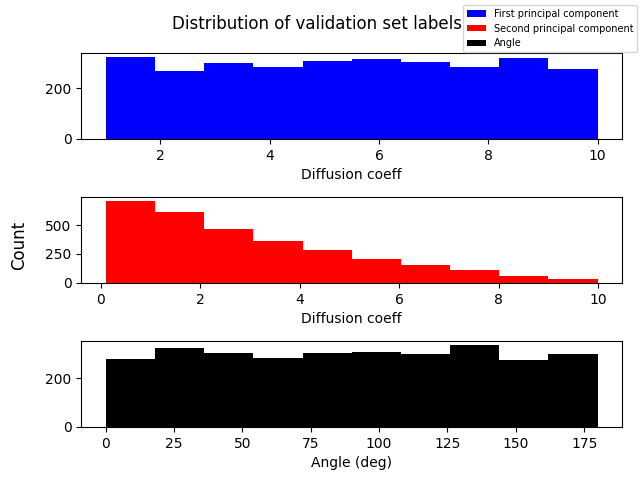

In [6]:
import matplotlib.pyplot as plt

# Show distribution of labels
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

ax1.hist(labels[:,0], color='b',label='First principal component')
ax2.hist(labels[:,1], color='r', label='Second principal component')
ax3.hist(np.rad2deg(labels[:,2]), color='k', label='Angle')

ax1.set_xlabel('Diffusion coeff')
ax2.set_xlabel('Diffusion coeff')
ax3.set_xlabel('Angle (deg)')

fig.supylabel('Count')
fig.suptitle('Distribution of validation set labels')
fig.legend(fontsize=7)
fig.tight_layout()
plt.show()

In [7]:
# Write data to file
np.savez('../validation_data_no_noise.npz', vids=videos, disp=displacement, labels=labels)